In [471]:
# import all required packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [472]:
#read the wine data from github
wine_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [473]:
# look at the top 10 rows and all the coloumns
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Exploratory Data Analysis (EDA)

In [474]:
print("DataFrame size is:",wine_df.shape)
print("Dataframe column Name:",wine_df.columns)

DataFrame size is: (1599, 12)
Dataframe column Name: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Dataframe has 1599 rows and 12 columns. out of 12 variables, 1 variable is dependant variable or target variable
and other variables are independant variable.



In [475]:
# check the datatypes 
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

out of 12 coloumns, all the independant variables are float type. which means, all these variables has the decimal values.
here, we also see that dependant variable is integer but we want to classify the problem based quality as good or bad.
to do that we will have to catgorise the quality varible in to binary class variable.

since the coloum is not in categorical nature first lets catgorise the values into binary class where quality is greater 
than 7 then its 'good/1' and others are 'not good/0'.

In [476]:
#lets create a new coloumn having the binary classification based on the criteria
def binary_class(x):
    if x < 7:
        return 0
    else:
        return 1

wine_df['wine_quality'] = wine_df['quality'].apply(binary_class)


we have now created a new coloumn wine quality which is a binary class variable and its created based on the quality coloumn
value.

In [477]:
wine_df['wine_quality'].value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

After creating a new coloumn as binary class variable now we can able to see that wine_quality variable has 0 and 1 in the
ratio of good(1) is 217 count and bad(0) is 1380 count of values.

In [478]:
# let remove the quality variable instead we will use the wine_quality.
wine_df.drop('quality',axis=1,inplace=True)
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


now we have removed the quality variable. going forward we will use the wine quality as target variable.

In [479]:
# check for the null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality            0
dtype: int64

there are no missing values in the dataframe.

<AxesSubplot:>

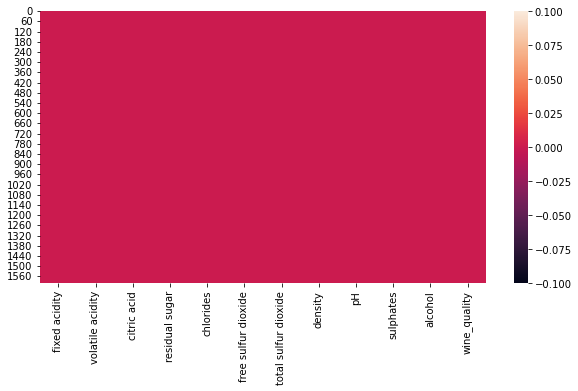

In [480]:
# visualize the missing value count in heat map
plt.figure(figsize=(10,5))
sns.heatmap(wine_df.isnull())

we can see that there is no change in the entire graph which means there is no null value present in the data.

In [481]:
# check the dataframe information
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  wine_quality          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


from above information we can see that there is no null values and 12 coloumns are there in df and 1599 rows in the dataframe.
also variables except wine quality remaining all are in float datatype. winequality is integer because we have created that coloumn having the value of 0 and 1.
but wine quality is a target variable and we have to classify the problem based on binary class hence we will change wine quality data type as str/object.

In [482]:
# change the wine quality datatype
wine_df['wine_quality']=wine_df['wine_quality'].astype(object)

In [483]:
# lets check now the dataframe information
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  wine_quality          1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


now the datatype of wine quality is changed to object. now we can see 11 varibles are float and 1 is object variable.

In [484]:
# lets check the values count for other variable and see if any variable needs to be changed to str
for i in wine_df.columns:
    print("The Unique values of",wine_df[i].value_counts())
    print("\n")

The Unique values of 7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


The Unique values of 0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


The Unique values of 0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


The Unique values of 2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


The Unique values of 0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int

as we see above none of the coloum are except target variable is having the categorical kind of data which means all
the coloumns are having more number of unique values and those are definitely continuous data and no need to convert them 
to string/object.
since all the variables are float in nature so there is no change of white space presence in the dataframe

In [485]:
# check the count of unique value in every coloumn.
wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
wine_quality              2
dtype: int64

we can observe that all varibles are having more than 60 unique values in every coloumn. only target variable has 1 unique 
value count.

In [486]:
#Now lets see the statistical summary of the dataframe
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


from above stat summary:
    1. first we can see that the value count of all coloumn is same which means no missing values in the dataframe.
    2. The mean is greater than the median[50%] from the coloum of 'fixed acidity','free sulfur dioxide',
        'total sulfur dioxide'. which means there is right skewness presents in these coloumns.
    3. by looking at the 75% and max value, we observe that there are outliers
       in the coloum of 'fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide'. we see how to handle 
        outlier going forward
        
        
        
       

<AxesSubplot:xlabel='fixed acidity'>

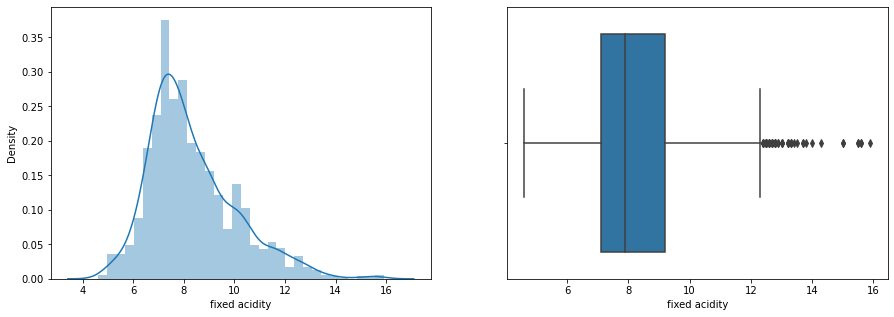

In [487]:
#lets see the data distribution for fixed acidity variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['fixed acidity'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['fixed acidity'])


insights:

   1.from distribution graph  we can observe that data is normaly distributed but date is small right skewness present in the data.
   2.we can also see that there are outliers presents in the data explained as per box plot.
   3. Also the fixed acidity high in the range between 7 to 9, the outlier starts after fixed acide level 12.

<AxesSubplot:xlabel='volatile acidity'>

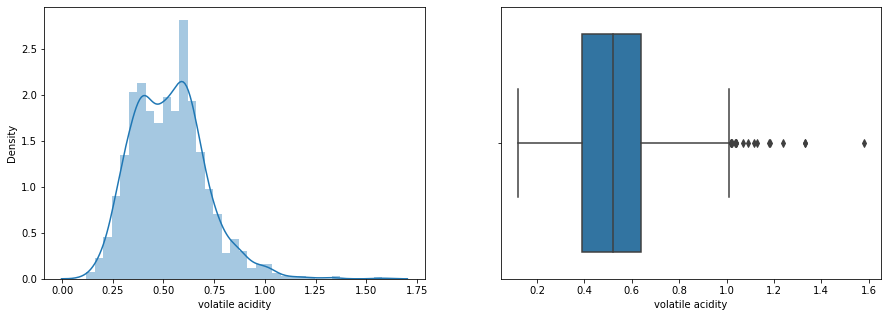

In [488]:
#lets see the data distribution for volatile acidity variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['volatile acidity'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['volatile acidity'])

insights:
    1. Data looks normally ditributed but it is right skewed. 
    2. there are outliers presents in the data as we can see it in box plot. outliers starts after the level 1.0 volatile acidity
    3. acidity level is high between 0.4 and 0.6
    


<AxesSubplot:xlabel='citric acid'>

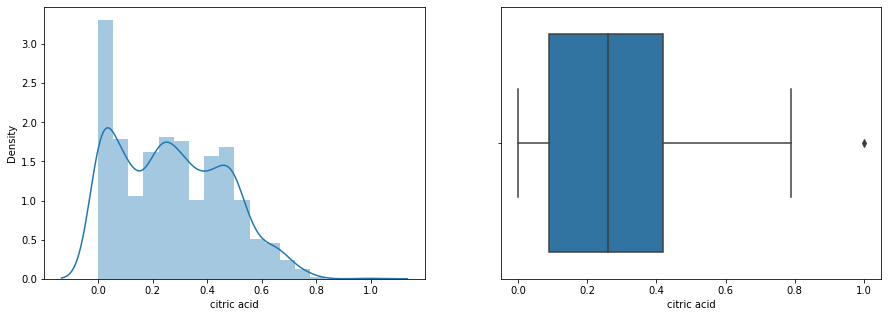

In [489]:
#lets see the data distribution for citric acid variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['citric acid'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['citric acid'])

Insights:
    1. citric acid feature is not symetric in nature and we will see how to solve it while going further.
    2. data has the right tail which means right skewed and it has the outliers.
    3. citric acid level is high between 0.2 and 0.4

<AxesSubplot:xlabel='residual sugar'>

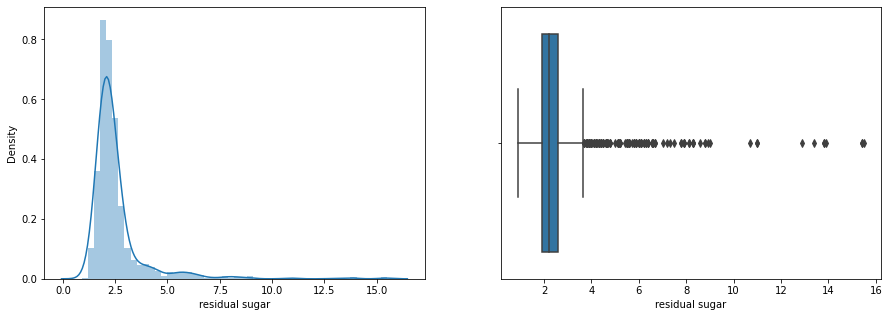

In [490]:
#lets see the data distribution for residual sugar variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['residual sugar'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['residual sugar'])

Insights:
    1. data is highly right skewed and has long tail on right which means we have many outlier presents in the data.
    2. maximun sugar level between 1 and 3.
    

<AxesSubplot:xlabel='chlorides'>

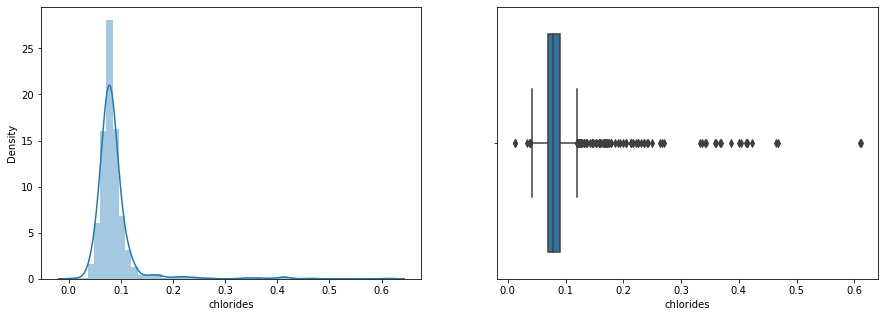

In [491]:
#lets see the data distribution for chlorides variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['chlorides'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['chlorides'])

insights:
    1. data is right skewed and has long tail on the right side which means the data has the outliers.


<AxesSubplot:xlabel='free sulfur dioxide'>

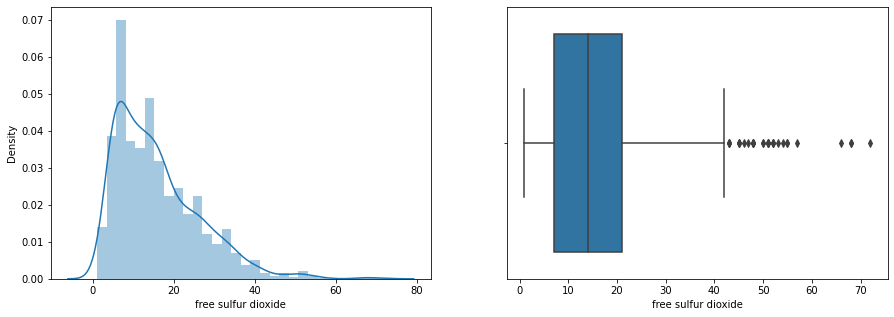

In [492]:
#lets see the data distribution for free sulfur dioxide variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['free sulfur dioxide'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['free sulfur dioxide'])

insight:
    1. Data is not symetric but has little bit bell curve hence we can say has some symetricsness. also data is right skewed
    which means there is a outliers in  the data.
    2. between 10 to 20 has the free sulfer dioxide

<AxesSubplot:xlabel='total sulfur dioxide'>

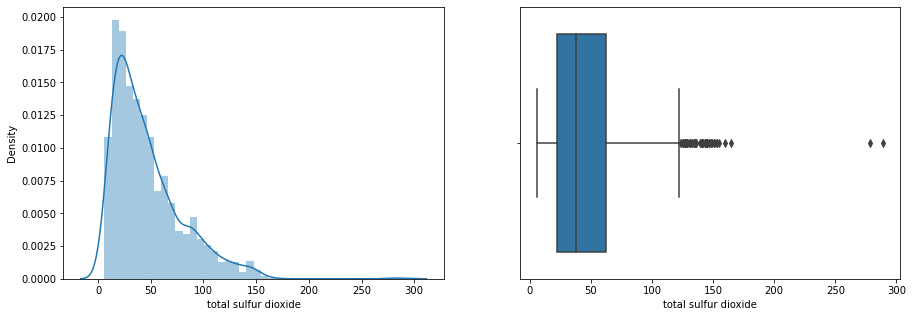

In [493]:
#lets see the data distribution for total sulfur dioxide variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['total sulfur dioxide'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['total sulfur dioxide'])

insight:
    1.Data has the right skewed and outliers.
    2. total sulfer is high between 20 to 70.

<AxesSubplot:xlabel='density'>

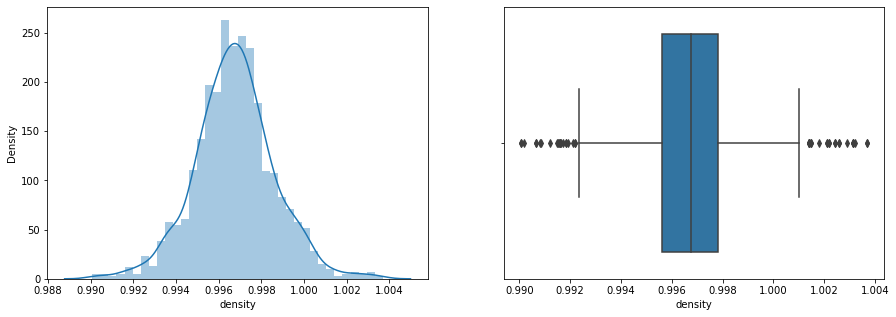

In [494]:
#lets see the data distribution for density variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['density'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['density'])

Insights:
    1. data is normally distributed howeve there small skewness on both right and left side.
    2. The density of the wine is higher between 0.996 and 0.998

<AxesSubplot:xlabel='pH'>

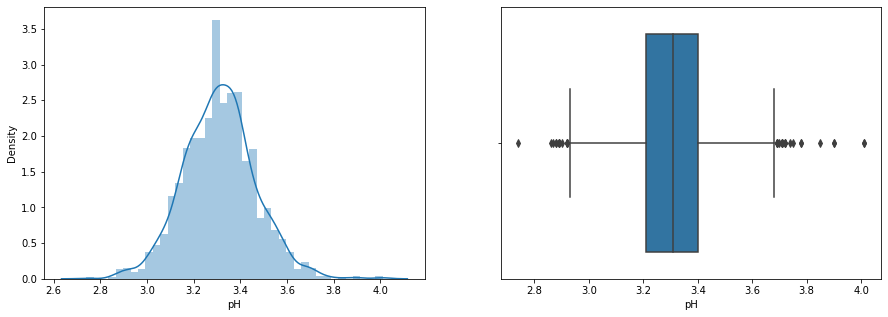

In [495]:
#lets see the data distribution for ph variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['pH'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['pH'])

Insights: 1. data is normally distributed howeve there small skewness on both right and left side.
          2. The density of the wine is higher between 3.2 and 3.4

<AxesSubplot:xlabel='sulphates'>

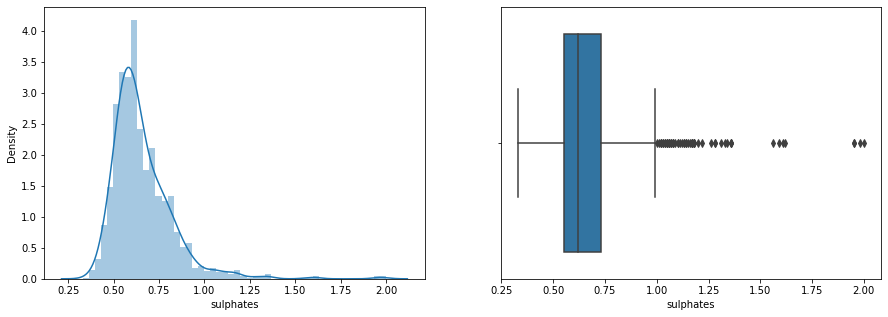

In [496]:
#lets see the data distribution for sulphates variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['sulphates'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['sulphates'])

Insights: 1. data has raight tail which means its right skewed and it has the outliers.
          2. The density of the wine is higher between 0.5 and 0.7

<AxesSubplot:xlabel='alcohol'>

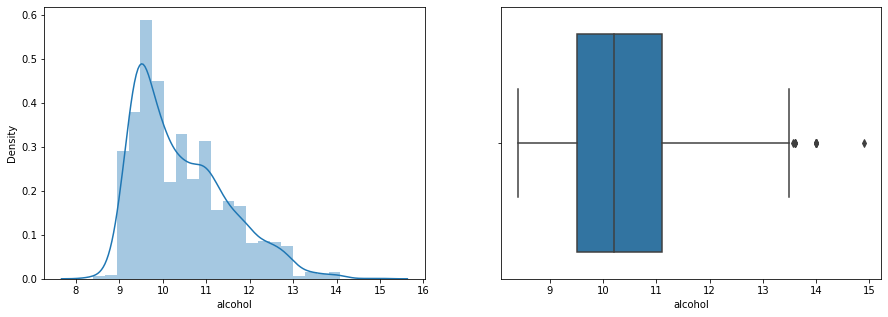

In [497]:
#lets see the data distribution for alcohol variable

ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(wine_df['alcohol'])
plt.subplot(1,2,2)
sns.boxplot(wine_df['alcohol'])

Insights: 1. data is not symatrical and has right skewed.
          2. The density of the wine is higher between 9.5 and 11

# Bi-variate/Multivariate Analysis

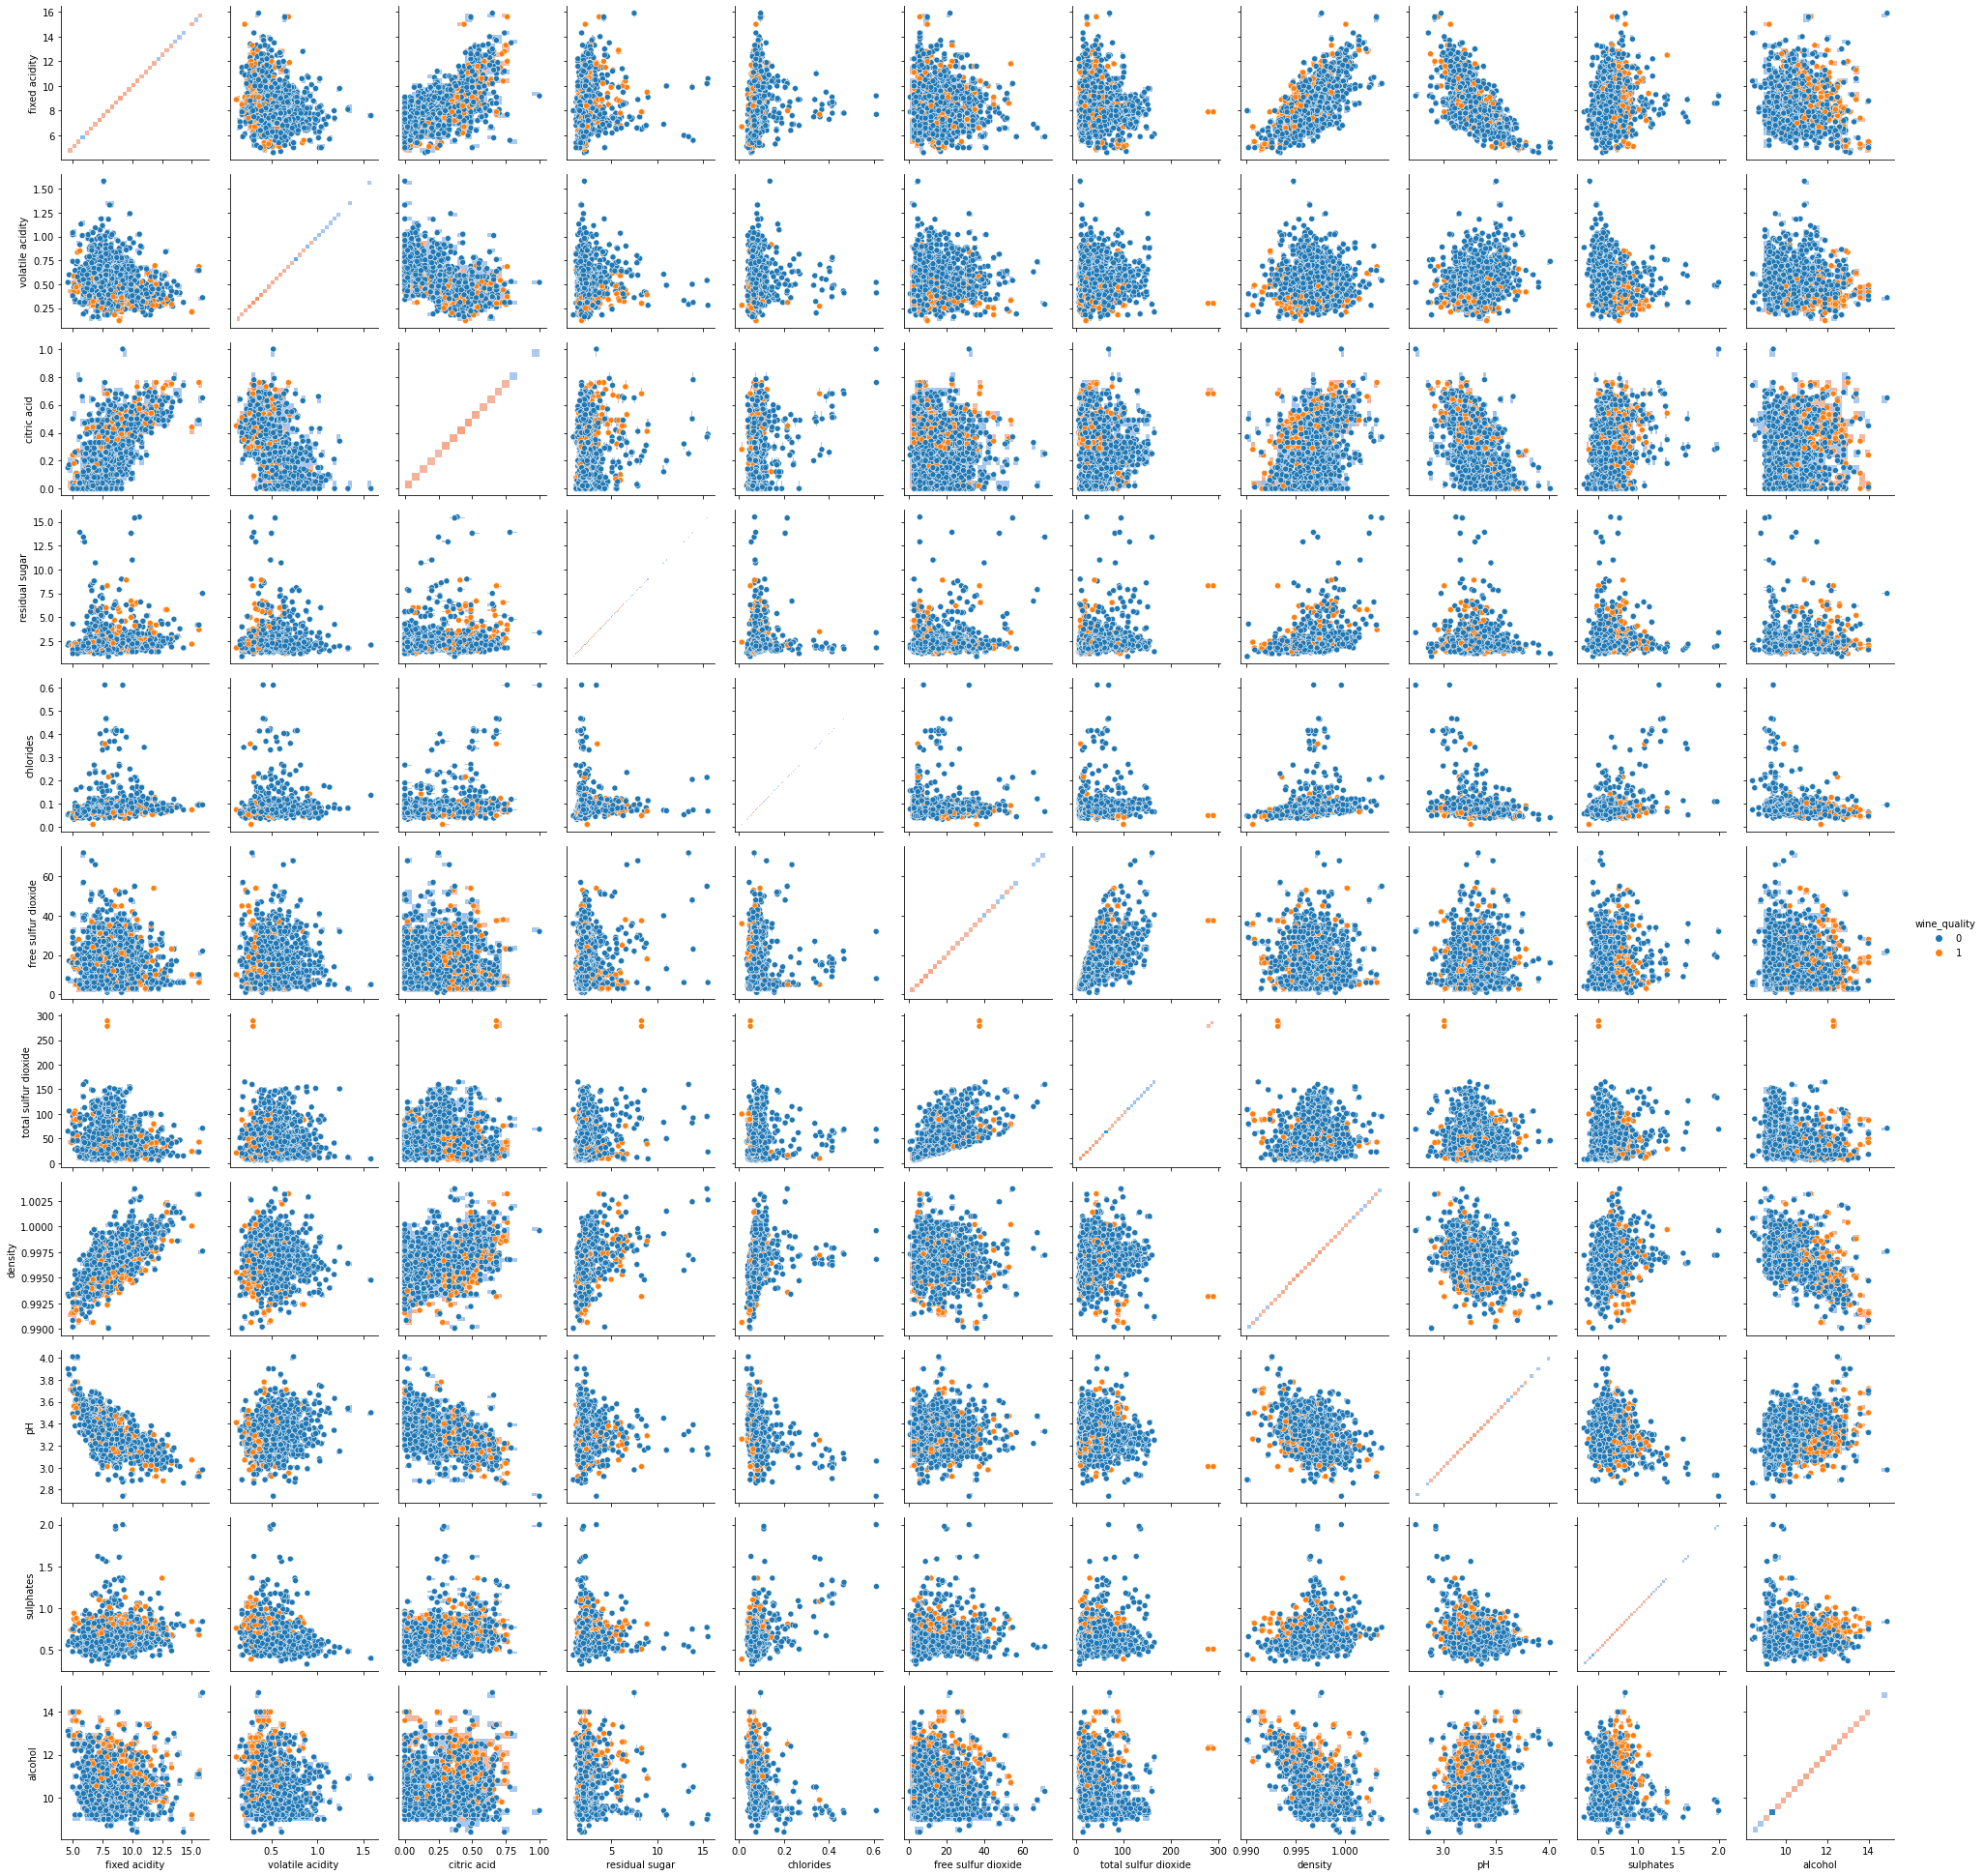

In [133]:
# lets check the relationship between dependant varibale and wine quality distribution.
t=sns.PairGrid(wine_df,hue='wine_quality')
t.map(sns.histplot)
t.map_offdiag(sns.scatterplot)
t.add_legend()


In [313]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


insights:
   #alcohol vs Other varaibles
     1. As we in the pair plot : There is positive linear relationship with PH and negative linear relationship with
        sulphates.
     2. Also to make th good wine the alcohol level should be 11 .
    
   #sulphates vs Other varaibles
     1. it has positive linear realtionship with density.
     2. To make wine the required sulphate is 0.7
     
   #PH vs Other varaibles
     1. PH  has negative linear realtionship with fixed acidity & citric acid.as PH decreases then the acidity &citric acid level will increase and it will not create any significant impact the wine quality.
     2. PH has positive linear realtionship with volatile acidity & free sulfur dioxide.
     
   #density vs Other varaibles
     1. desity has postiv linear relationship with fixed acidity & citric acid.
     2. when the density is moderate we can see the quality of wine good when it combines to other ingredients.
     
   #Total sulfur dioxide  vs other variable relatinship
     1.  Total sulfur dioxide has positive linear relatinship with free sulfur dioxide.
     2.  Total sulfur dioxide  should be small amount of volume when its mixed with other chemical to bring the good wines.
     
   #chlorides vs other variable relatinship 
     1. There is no linear realtionship as such with other variables.
     2. chlorides level less than 0.1 has the high chances of making the good wine when it combines to other factors.
   
   #residual sugar vs other variable relatinship 
     1. Does not have the linear relationship  with any of  the coloumns.

     
   
     
     
    
   
  
     
   
   

In [498]:
# now lets check the skewness in the data
wine_df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
wine_quality            2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

The variable except ph,density,citric acid, others has the skewess by assuming skwness thresold is +-0.5. since the sernior citize col in catgorical we dont have to treat the skewness but for Total charges is numberical so we will try some method t treat it.
we will use cube root method.

In [499]:
# lets take cube rt to all the skewness col
wine_df['fixed acidity']=np.cbrt(wine_df['fixed acidity'])
wine_df['residual sugar']=np.cbrt(wine_df['residual sugar'])
wine_df['chlorides']=np.cbrt(wine_df['chlorides'])
wine_df['sulphates']=np.cbrt(wine_df['sulphates'])
wine_df['total sulfur dioxide']=np.cbrt(wine_df['total sulfur dioxide'])
wine_df['free sulfur dioxide']=np.cbrt(wine_df['free sulfur dioxide'])
wine_df['alcohol']=np.cbrt(wine_df['alcohol'])
wine_df['volatile acidity']=np.cbrt(wine_df['volatile acidity'])


In [503]:
# lets check again after removed the skewness
wine_df.skew().sort_values(ascending=False)

chlorides               3.059529
residual sugar          2.532201
wine_quality            2.129363
sulphates               1.322148
alcohol                 0.725907
fixed acidity           0.587668
total sulfur dioxide    0.393746
citric acid             0.318337
free sulfur dioxide     0.247358
pH                      0.193683
density                 0.071288
volatile acidity       -0.070512
dtype: float64

Now we can able to see that skeweness 

In [504]:
# lets convert the target val to into so that we can calculate the zscore
wine_df['wine_quality']=wine_df['wine_quality'].astype('int')

In [505]:
 # removing outliers, we will use z score to remove the outlier 
import scipy   
from scipy.stats import zscore
import scipy.stats as stats

In [506]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,0
1,1.983192,0.958284,0.00,1.375069,0.461044,2.924018,4.061548,0.99680,3.20,0.879366,2.139975,0
2,1.983192,0.912581,0.04,1.320006,0.451436,2.466212,3.779763,0.99700,3.26,0.866239,2.139975,0
3,2.237378,0.654213,0.56,1.238562,0.421716,2.571282,3.914868,0.99800,3.16,0.833955,2.139975,0
4,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.843433,0.08,1.259921,0.448140,3.174802,3.530348,0.99490,3.45,0.833955,2.189760,0
1595,1.806969,0.819321,0.10,1.300591,0.395789,3.391211,3.708430,0.99512,3.52,0.912581,2.237378,0
1596,1.846915,0.798957,0.13,1.320006,0.423582,3.072317,3.419952,0.99574,3.42,0.908560,2.223980,0
1597,1.806969,0.864012,0.12,1.259921,0.421716,3.174802,3.530348,0.99547,3.57,0.892112,2.168703,0


In [507]:
z=np.abs(stats.zscore(wine_df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,0.502833,0.980285,1.391472,0.552402,0.242092,0.323303,0.217554,0.558274,1.288643,0.601783,0.983467,0.396256
1,0.249061,1.745223,1.391472,0.207150,0.455439,0.983836,0.813317,0.028261,0.719933,0.221852,0.577411,0.396256
2,0.249061,1.248486,1.186070,0.099231,0.276540,0.129002,0.459903,0.134264,0.331177,0.025664,0.577411,0.396256
3,1.620799,1.559625,1.484154,0.552402,0.276838,0.325192,0.629351,0.664277,0.979104,0.456840,0.577411,0.396256
4,0.502833,0.980285,1.391472,0.552402,0.242092,0.323303,0.217554,0.558274,1.288643,0.601783,0.983467,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.323829,0.496940,0.980669,0.433557,0.215182,1.452110,0.147087,0.978765,0.899886,0.456840,0.107374,0.396256
1595,1.545413,0.234881,0.877968,0.207258,0.759603,1.856199,0.370437,0.862162,1.353436,0.718264,0.762362,0.396256
1596,1.251559,0.013548,0.723916,0.099231,0.242092,1.260746,0.008628,0.533554,0.705508,0.658180,0.578076,0.396256
1597,1.545413,0.720613,0.775267,0.433557,0.276838,1.452110,0.147087,0.676657,1.677400,0.412352,0.182260,0.396256


In [508]:
# lets create a new dataframe using after removing the outliers

df1=wine_df[(z<3).all(axis=1)]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,0
1,1.983192,0.958284,0.00,1.375069,0.461044,2.924018,4.061548,0.99680,3.20,0.879366,2.139975,0
2,1.983192,0.912581,0.04,1.320006,0.451436,2.466212,3.779763,0.99700,3.26,0.866239,2.139975,0
3,2.237378,0.654213,0.56,1.238562,0.421716,2.571282,3.914868,0.99800,3.16,0.833955,2.139975,0
4,1.948695,0.887904,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.843433,0.08,1.259921,0.448140,3.174802,3.530348,0.99490,3.45,0.833955,2.189760,0
1595,1.806969,0.819321,0.10,1.300591,0.395789,3.391211,3.708430,0.99512,3.52,0.912581,2.237378,0
1596,1.846915,0.798957,0.13,1.320006,0.423582,3.072317,3.419952,0.99574,3.42,0.908560,2.223980,0
1597,1.806969,0.864012,0.12,1.259921,0.421716,3.174802,3.530348,0.99547,3.57,0.892112,2.168703,0


In [509]:
# check the data again 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1488 non-null   float64
 1   volatile acidity      1488 non-null   float64
 2   citric acid           1488 non-null   float64
 3   residual sugar        1488 non-null   float64
 4   chlorides             1488 non-null   float64
 5   free sulfur dioxide   1488 non-null   float64
 6   total sulfur dioxide  1488 non-null   float64
 7   density               1488 non-null   float64
 8   pH                    1488 non-null   float64
 9   sulphates             1488 non-null   float64
 10  alcohol               1488 non-null   float64
 11  wine_quality          1488 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 145.3 KB


In [510]:
corr=df1.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
fixed acidity,1.000000,-0.294924,0.696674,0.195335,0.211844,-0.162694,-0.097510,0.670115,-0.712701,0.206018,-0.033260,0.120009
volatile acidity,-0.294924,1.000000,-0.591354,0.047235,0.125009,0.032021,0.111699,0.006016,0.248801,-0.340677,-0.216949,-0.271384
citric acid,0.696674,-0.591354,1.000000,0.178706,0.091167,-0.094906,-0.007668,0.379004,-0.526523,0.307864,0.157977,0.219163
residual sugar,0.195335,0.047235,0.178706,1.000000,0.186496,0.027965,0.109418,0.382855,-0.081687,0.087641,0.147366,0.094387
chlorides,0.211844,0.125009,0.091167,0.186496,1.000000,-0.001051,0.108275,0.372570,-0.193692,0.017565,-0.253182,-0.141477
free sulfur dioxide,-0.162694,0.032021,-0.094906,0.027965,-0.001051,1.000000,0.752617,-0.035925,0.118158,0.055214,-0.090403,-0.087375
total sulfur dioxide,-0.097510,0.111699,-0.007668,0.109418,0.108275,0.752617,1.000000,0.133525,0.004906,0.007264,-0.268766,-0.177804
density,0.670115,0.006016,0.379004,0.382855,0.372570,-0.035925,0.133525,1.000000,-0.315423,0.164157,-0.457725,-0.144685
pH,-0.712701,0.248801,-0.526523,-0.081687,-0.193692,0.118158,0.004906,-0.315423,1.000000,-0.046174,0.141921,-0.076071
sulphates,0.206018,-0.340677,0.307864,0.087641,0.017565,0.055214,0.007264,0.164157,-0.046174,1.000000,0.230832,0.290364


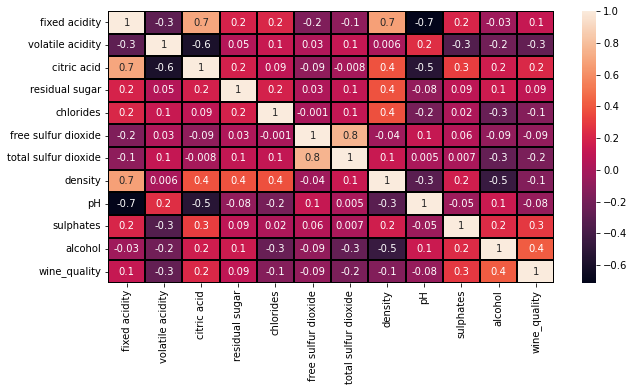

In [511]:
# lets visualize the correaltion in heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap=None)
plt.show()

insights:
a.As we can see above fixed acidity,citric acid,sulphates and alcohol has the positive corelation vs target variable.
b. volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density and pH has the negative corealtion vs target varaible.
c. we also see that there are high negative/positive relationship between the independant variable also which may leads to multicolinearity.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality'],
      dtype='object')

In [512]:
# lets see all independant variable correlation with target variable
corr['wine_quality'].sort_values(ascending=False)

wine_quality            1.000000
alcohol                 0.416619
sulphates               0.290364
citric acid             0.219163
fixed acidity           0.120009
residual sugar          0.094387
pH                     -0.076071
free sulfur dioxide    -0.087375
chlorides              -0.141477
density                -0.144685
total sulfur dioxide   -0.177804
volatile acidity       -0.271384
Name: wine_quality, dtype: float64

we see there are negative and positive correlation between independant and target variable

In [513]:
#separting the Target and features variables
x=df1.drop('wine_quality',axis=1)
y=df1['wine_quality']

In [514]:
# feature scaling using standard scalling 
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=pd.DataFrame(sd.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.523496,0.998750,-1.381982,-0.618142,-0.216913,-0.303493,-0.184771,0.616263,1.370388,-0.615388,-1.019164
1,-0.260372,1.784554,-1.381982,0.369872,0.902187,1.030653,0.874589,0.041824,-0.814654,0.334872,-0.595271
2,-0.260372,1.274267,-1.173185,-0.028664,0.615165,0.158157,0.511408,0.156712,-0.391742,0.108522,-0.595271
3,1.678394,-1.610447,1.541175,-0.618142,-0.272658,0.358401,0.685539,0.731151,-1.096594,-0.448162,-0.595271
4,-0.523496,0.998750,-1.381982,-0.618142,-0.216913,-0.303493,-0.184771,0.616263,1.370388,-0.615388,-1.019164
...,...,...,...,...,...,...,...,...,...,...,...
1483,-1.374746,0.502220,-0.964388,-0.463551,0.516724,1.508603,0.189947,-1.049609,0.947477,-0.448162,0.119598
1484,-1.604495,0.233012,-0.859989,-0.169185,-1.047194,1.921040,0.419469,-0.923232,1.440873,0.907602,0.803360
1485,-1.299813,0.005641,-0.703392,-0.028664,-0.216913,1.313284,0.047662,-0.567081,0.736021,0.838280,0.610978
1486,-1.604495,0.731994,-0.755591,-0.463551,-0.272658,1.508603,0.189947,-0.722179,1.793299,0.554659,-0.182760


now we have standardised the values using StandardScaler scaller now all the variable has same scale

In [515]:
# we have seen the multicolinearity between the independant variables and we will solve the problem using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF['VIF_Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF['Features']=x.columns
VIF

,VIF_Values,Features
0,8.159604,fixed acidity
1,1.913184,volatile acidity
2,3.201331,citric acid
3,1.750611,residual sugar
4,1.224935,chlorides
5,2.604030,free sulfur dioxide
6,2.929267,total sulfur dioxide
7,6.807158,density
8,3.331848,pH
9,1.339564,sulphates


we can see that fixed acidity has the higher VIF value hence lets remove and see the VIF again below


In [377]:
x.drop('fixed acidity',axis=1,inplace=True)

In [516]:
#lets check the VIF now after removing the fixed acidity variable
VIF=pd.DataFrame()
VIF['VIF_Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF['Features']=x.columns
VIF

,VIF_Values,Features
0,8.159604,fixed acidity
1,1.913184,volatile acidity
2,3.201331,citric acid
3,1.750611,residual sugar
4,1.224935,chlorides
5,2.604030,free sulfur dioxide
6,2.929267,total sulfur dioxide
7,6.807158,density
8,3.331848,pH
9,1.339564,sulphates


Now we can see that the VIF values came down below 5 for all the variables,which means there is less corelation between the
predictor with other predictors.
now the multilinearity problem solved.

In [517]:
# we can observe that the target variable is not balanced
y.value_counts()

0    1290
1     198
Name: wine_quality, dtype: int64

since the target values are not balance it will lead to the poor performance and baiseness while building the data.
we will have to balance the data before feeding in to model

# oversampling

In [518]:
#appling oversampling using the SMOTE method
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [519]:
# now check the target variable count
y.value_counts()

0    1290
1    1290
Name: wine_quality, dtype: int64

after resampling we can see that the data is balanced there we can go head with the model building

In [397]:
y=y.astype('str')

In [520]:
# let split the training and test data also find the best random state using the randomforest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_acc=0
best_rstat=0

for seed in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=seed)
    rfc=RandomForestClassifier()
    model=rfc.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>best_acc:
        best_acc=acc
        best_rstat=seed
print('the best acc is:',best_acc,'best random state is:',best_rstat)
    
    


the best acc is: 0.962532299741602 best random state is: 140


we can see that random state 28 is giving the best accuracy therefore we will use 28 as a randome state to splite the data


In [539]:
# now splite the data using random state as 28
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=28)

In [540]:
# let import all the classification algorithms & model validation metrics
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.model_selection import cross_val_score

In [541]:
# lets build the model using randomforest
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
rfc_pred=model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))


model_accuracy: 0.9547803617571059


[[357  23]
 [ 12 382]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       380
           1       0.94      0.97      0.96       394

    accuracy                           0.95       774
   macro avg       0.96      0.95      0.95       774
weighted avg       0.96      0.95      0.95       774



The model accuracy is 95% which is good accuracy. also the True postive and True Nagative values good which means the 
model can predict on high accuracy.

In [542]:
# lets build the next model logistice regression
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(classification_report(y_test,lr_pred))

model_accuracy: 0.8294573643410853


[[305  75]
 [ 57 337]]


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       380
           1       0.82      0.86      0.84       394

    accuracy                           0.83       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.83      0.83      0.83       774



The logistic regression accuracy is reduced compared to randomforest classifier.

In [543]:
# lets build support vector model
svc=SVC()
svc_model=svc.fit(x_train,y_train)
svc_pred=svc_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,svc_pred))
print('\n')
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

model_accuracy: 0.8953488372093024


[[332  48]
 [ 33 361]]


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       380
           1       0.88      0.92      0.90       394

    accuracy                           0.90       774
   macro avg       0.90      0.89      0.90       774
weighted avg       0.90      0.90      0.90       774



SVC model accuracy is 90%

In [544]:
# lets build extra tree classifier model
etc=ExtraTreesClassifier()
etc_model=etc.fit(x_train,y_train)
etc_pred=etc_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,etc_pred))
print('\n')
print(confusion_matrix(y_test,etc_pred))
print('\n')
print(classification_report(y_test,etc_pred))

model_accuracy: 0.9573643410852714


[[359  21]
 [ 12 382]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       380
           1       0.95      0.97      0.96       394

    accuracy                           0.96       774
   macro avg       0.96      0.96      0.96       774
weighted avg       0.96      0.96      0.96       774



Extratree classifier is giving good accuracy 96%

In [545]:
# lets adaboost classfier model
adc=AdaBoostClassifier()
adc_model=adc.fit(x_train,y_train)
adc_pred=adc_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,adc_pred))
print('\n')
print(confusion_matrix(y_test,adc_pred))
print('\n')
print(classification_report(y_test,adc_pred))

model_accuracy: 0.8708010335917312


[[326  54]
 [ 46 348]]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       380
           1       0.87      0.88      0.87       394

    accuracy                           0.87       774
   macro avg       0.87      0.87      0.87       774
weighted avg       0.87      0.87      0.87       774



Ada boost classifier accuracy is  : 87%

In [546]:
# lets build GradientBoostingClassifier model
gbc=GradientBoostingClassifier()
gbc_model=gbc.fit(x_train,y_train)
gbc_pred=gbc_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,gbc_pred))
print('\n')
print(confusion_matrix(y_test,gbc_pred))
print('\n')
print(classification_report(y_test,gbc_pred))

model_accuracy: 0.9211886304909561


[[351  29]
 [ 32 362]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       380
           1       0.93      0.92      0.92       394

    accuracy                           0.92       774
   macro avg       0.92      0.92      0.92       774
weighted avg       0.92      0.92      0.92       774



GradientBoostingClassifier accuracy is : 91%

In [529]:
# lets BaggingClassifier model
bc=BaggingClassifier()
bc_model=bc.fit(x_train,y_train)
bc_pred=bc_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,bc_pred))
print('\n')
print(confusion_matrix(y_test,bc_pred))
print('\n')
print(classification_report(y_test,bc_pred))

model_accuracy: 0.9289405684754521


[[352  30]
 [ 25 367]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       382
           1       0.92      0.94      0.93       392

    accuracy                           0.93       774
   macro avg       0.93      0.93      0.93       774
weighted avg       0.93      0.93      0.93       774



BaggingClassifier accuracy is : 92%

In [547]:
# lets Decision tree model
dcc=DecisionTreeClassifier()
dcc_model=dcc.fit(x_train,y_train)
dcc_pred=dcc_model.predict(x_test)
print('model_accuracy:',accuracy_score(y_test,dcc_pred))
print('\n')
print(confusion_matrix(y_test,dcc_pred))
print('\n')
print(classification_report(y_test,dcc_pred))

model_accuracy: 0.917312661498708


[[351  29]
 [ 35 359]]


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       380
           1       0.93      0.91      0.92       394

    accuracy                           0.92       774
   macro avg       0.92      0.92      0.92       774
weighted avg       0.92      0.92      0.92       774



Decision tree accuracy is : 93%

In [548]:
# cross validation score on extra tree classification
score=cross_val_score(etc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,etc_pred)-score.mean())

[0.98449612 0.88565891 0.96511628 0.88372093 0.94573643]
0.9329457364341085
The differnce between model_pred and cross val score mean: 0.024418604651162856


In [549]:
# cross validation score on Randomforest classifier
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,rfc_pred)-score.mean())

[0.96705426 0.89728682 0.94573643 0.88953488 0.9127907 ]
0.9224806201550388
The differnce between model_pred and cross val score mean: 0.032299741602067056


In [550]:
# cross validation score on Logisticregression classifier
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,lr_pred)-score.mean())

[0.88953488 0.77906977 0.86046512 0.73062016 0.81589147]
0.8151162790697674
The differnce between model_pred and cross val score mean: 0.014341085271317944


In [551]:
# cross validation score on sv classifier
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,svc_pred)-score.mean())

[0.93992248 0.83139535 0.89534884 0.8003876  0.86434109]
0.8662790697674418
The differnce between model_pred and cross val score mean: 0.029069767441860517


In [552]:
# cross validation score on adaboost classifier
score=cross_val_score(adc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,adc_pred)-score.mean())

[0.89147287 0.81395349 0.87984496 0.76162791 0.85465116]
0.8403100775193799
The differnce between model_pred and cross val score mean: 0.030490956072351305


In [553]:
# cross validation score on GradientBoostingClassifier classifier
score=cross_val_score(gbc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,gbc_pred)-score.mean())

[0.92054264 0.84689922 0.91472868 0.8120155  0.87403101]
0.8736434108527131
The differnce between model_pred and cross val score mean: 0.047545219638242986


In [554]:
# cross validation score on BaggingClassifier classifier
score=cross_val_score(bc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,bc_pred)-score.mean())

[0.93604651 0.87209302 0.91666667 0.8624031  0.88565891]
0.8945736434108527
The differnce between model_pred and cross val score mean: -0.38940568475452186


In [555]:
# cross validation score on Decision tree classifier
score=cross_val_score(dcc,x,y,cv=5)
print(score)
print(score.mean())
print('The differnce between model_pred and cross val score mean:',accuracy_score(y_test,dcc_pred)-score.mean())

[0.86821705 0.86046512 0.8875969  0.84108527 0.87015504]
0.8655038759689923
The differnce between model_pred and cross val score mean: 0.051808785529715795


# The best model is Adaboost classifier since it has the less difference between the model acc vs cross_val_Score mean

In [556]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [557]:
#hyper tuning the adaboost model
grid=dict()
model=AdaBoostClassifier()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.891283 using {'learning_rate': 1.0, 'n_estimators': 500}


In [559]:
# now lets build the final mode using above values
final_model=AdaBoostClassifier(n_estimators=500,learning_rate=1.0)
final_model.fit(x_train,y_train)
f_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,f_pred)
print(acc)

0.9108527131782945


now we can see the adaboost accuracy is improved

In [562]:
# see the auc and Roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

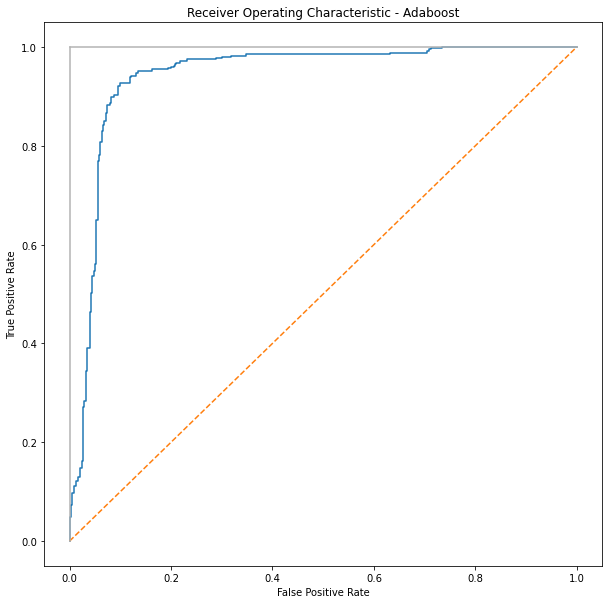

auc score is: 0.9106598984771573


In [567]:
final_pred=final_model.predict_proba(x_test)[:,1]
fpr,tpr, thresholds=roc_curve(y_test,final_pred)
roc_auc=auc(fpr,tpr)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Adaboost')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
score=roc_auc_score(y_test,final_model.predict(x_test))
print('auc score is:',score)



In [568]:
# saving the model
import joblib
joblib.dump(final_model,"wine_quality_prediction.pkl")


['wine_quality_prediction.pkl']

In [569]:
# lets pass a new data check whether the model is loading or not
model=joblib.load('wine_quality_prediction.pkl')

In [570]:
pred=model.predict(x_test)
pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Yea now the model is ready